In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run ../helper/preprocess.py
%run ../helper/aggregate.py
%run ../helper/utils.py

In [52]:
def plot_avg_metrics_curve(metrics_df, metrics_to_plot, x_columns=None):
    """
    Plot selected metrics using a line plot.
    
    :param metrics_df: DataFrame with metrics and 'Folder' column.
    :param metrics_to_plot: List of metric columns to plot.
    :param x_columns: List of column names to use for the x-axis.
    """
    plt.figure(figsize=(12, 8))

    metrics_df = metrics_df.copy()
    if x_columns is None:
        x_columns = ['Config']
    # Create a combined x-label using the values from the specified x_columns
    metrics_df['combined_x'] = metrics_df[x_columns].astype(str).agg(
        ' - '.join, axis=1)

    existing_columns = list(metrics_df.columns)
    # Determine the column to sort by:
    if metrics_to_plot[0] in existing_columns:
        sort_by_column = metrics_to_plot[0]
    elif metrics_to_plot[0] + ('mean',) in existing_columns:
        sort_by_column = metrics_to_plot[0] + ('mean',)
    else:
        raise ValueError(
            f"Cannot determine sort column based on {metrics_to_plot[0]}")

    sorted_df = metrics_df.sort_values(by=sort_by_column)

    for metric in metrics_to_plot:
        # If metric directly exists
        if metric in existing_columns:
            to_plot = sorted_df[metric]
            # to_plot_normalized = (to_plot - np.min(to_plot)) / (
            #     np.max(to_plot) - np.min(to_plot))
            plt.plot(sorted_df['combined_x'], to_plot, label=metric)

        # If {metric}_mean and {metric}_std exist
        elif metric + ('mean',) in existing_columns and metric + ('stderr',) in existing_columns:
            mean_plot = sorted_df[metric + ('mean',)]
            std_plot = sorted_df[metric + ('stderr',)]

            # mean_plot_normalized = (mean_plot - np.min(mean_plot)) / (
            #     np.max(mean_plot) - np.min(mean_plot))
            # std_plot_normalized = std_plot / (
            #     np.max(mean_plot) - np.min(mean_plot)
            # )  # Normalize std based on mean's range

            plt.plot(sorted_df['combined_x'],
                     mean_plot,
                     label=f"{metric}")
            plt.fill_between(sorted_df['combined_x'],
                             mean_plot - std_plot,
                             mean_plot + std_plot,
                             alpha=0.2)
        else:
            raise ValueError(
                f"Column {metric} or {metric} mean and {metric} stderr not found in dataframe!"
            )

    plt.ylabel('Metric Value')
    plt.title('Selected Metrics Over Folders')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

    # Cleanup: Drop the combined_x column from the dataframe to keep the original df intact
    # metrics_df.drop(columns=['combined_x'], level=0, inplace=True)

In [2]:
metrics_file = '../metrics/ddim_sd15_metrics.csv'
config_file = '../../exp_configs/config_mapping.csv'

# keywords_to_exclude = ['Prodigy', '1054', '1057', 'scalar']
keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    rank=True,
    metrics_to_include=None,
    keywords_to_exclude=keywords_to_exclude)

display(metrics_processed)

Config  Algo    Preset     Lr      Dim  \
Architecture                                                                 
Condition                                                                    
0             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
1             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
2             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
3             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
4             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
...                                    ...   ...       ...    ...      ...   
22108          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22109          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22110          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22111          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22112          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   

             Alpha Factor Seed Step Category  ... Squared Centroid Distance  \
Architecture                                  ...             DINOv2-resize   
Condition                                     ...                   trigger   
0              2.0    NaN    a   10    scene  ...                  0.712766   
1              2.0    NaN    a   10    scene  ...                  0.712766   
2              2.0    NaN    a   10    scene  ...                  0.712766   
3              2.0    NaN    a   10    scene  ...                  0.659574   
4              2.0    NaN    a   10    scene  ...                  0.659574   
...            ...    ...  ...  ...      ...  ...                       ...   
22108          1.0    8.0    b   30   people  ...                  0.005319   
22109          1.0    8.0    b   30   people  ...                  0.005319   
22110          1.0    8.0    b   30   people  ...                  0.111702   
22111          1.0    8.0    b   30   people  ...                  0.111702   
22112          1.0    8.0    b   30   people  ...                  0.111702   

             Text Similarity                         Vendi            \
Architecture            CLIP                          CLIP             
Condition                 in       out   trigger        in       out   
0                   0.313830  0.707447  0.111702  0.691489  0.409574   
1                   0.313830  0.707447  0.111702  0.691489  0.409574   
2                   0.313830  0.707447  0.111702  0.691489  0.409574   
3                   0.132979  0.723404  0.239362  0.207447  0.515957   
4                   0.132979  0.723404  0.239362  0.207447  0.515957   
...                      ...       ...       ...       ...       ...   
22108               0.074468  0.010638  0.590426  0.228723  0.244681   
22109               0.074468  0.010638  0.590426  0.228723  0.244681   
22110               0.579787  0.010638  0.973404  0.015957  0.037234   
22111               0.579787  0.010638  0.973404  0.015957  0.037234   
22112               0.579787  0.010638  0.973404  0.015957  0.037234   

                                                        
Architecture ConvNeXt V2              DINOv2            
Condition             in       out        in       out  
0               0.760638  0.420213  0.324468  0.260638  
1               0.760638  0.420213  0.324468  0.260638  
2               0.760638  0.420213  0.324468  0.260638  
3               0.058511  0.542553  0.154255  0.271277  
4               0.058511  0.542553  0.154255  0.271277  
...                  ...       ...       ...       ...  
22108           0.228723  0.015957  0.095745  0.005319  
22109           0.228723  0.015957  0.095745  0.005319  
22110           0.085106  0.026596  0.090426  0.026596  
22111           0.085106  0.026596  0.090426  0.026596  
22112           0.085106  0.026596  0.090426  0.026596  

[22113 rows x 75 columns]

## All

In [4]:
metrics_aggregated = aggregate_metrics(metrics_processed, level='All', group_seeds=True)
display(metrics_aggregated)

Config  Algo    Preset      Lr      Dim  \
Architecture                                                                 
Condition                                                                    
Statistics                                                                   
0                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
1                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
2                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
3                 exp-1002-sd15-lora32a16  lora  attn-mlp  0.0005     32.0   
4                 exp-1002-sd15-lora32a16  lora  attn-mlp  0.0005     32.0   
..                                    ...   ...       ...     ...      ...   
58            exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
59            exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
60            exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
61            exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
62            exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   

             Alpha Factor Step Image Similarity            ...     Vendi  \
Architecture                          CLIP-crop            ...      CLIP   
Condition                                    in            ...       out   
Statistics                                 mean    stderr  ...      mean   
0              4.0    NaN   10         0.637645  0.018354  ...  0.500088   
1              4.0    NaN   30         0.573198  0.014970  ...  0.405920   
2              4.0    NaN   50         0.422146  0.015783  ...  0.333280   
3             16.0    NaN   10         0.605997  0.021500  ...  0.472009   
4             16.0    NaN   30         0.357826  0.013028  ...  0.441325   
..             ...    ...  ...              ...       ...  ...       ...   
58             1.0    8.0   30         0.457088  0.017154  ...  0.570066   
59             1.0    8.0   50         0.332603  0.015494  ...  0.565759   
60             1.0    8.0   10         0.217281  0.015170  ...  0.859246   
61             1.0    8.0   30         0.114553  0.013351  ...  0.852855   
62             1.0    8.0   50         0.137760  0.013273  ...  0.863202   

                                                                            \
Architecture           ConvNeXt V2                                  DINOv2   
Condition                       in                 out                  in   
Statistics      stderr        mean    stderr      mean    stderr      mean   
0             0.015873    0.610781  0.015588  0.503138  0.015050  0.462323   
1             0.016611    0.407951  0.015182  0.392747  0.016516  0.433890   
2             0.015186    0.474436  0.017437  0.378755  0.017497  0.516302   
3             0.021432    0.478348  0.020624  0.512241  0.020287  0.408323   
4             0.023967    0.433677  0.020077  0.491800  0.023160  0.462869   
..                 ...         ...       ...       ...       ...       ...   
58            0.018761    0.454256  0.016209  0.570975  0.018307  0.497392   
59            0.018654    0.548014  0.018484  0.650325  0.017877  0.566801   
60            0.013611    0.740630  0.023228  0.876264  0.014086  0.720812   
61            0.017708    0.704713  0.024421  0.866841  0.017175  0.680681   
62            0.016192    0.582079  0.027534  0.900225  0.013097  0.603122   

                                            
Architecture                                
Condition                    out            
Statistics      stderr      mean    stderr  
0             0.016301  0.467092  0.015608  
1             0.015352  0.430554  0.015709  
2             0.017909  0.437114  0.015082  
3             0.019707  0.449872  0.021146  
4             0.020122  0.491933  0.024543  
..                 ...       ...       ...  
58            0.018921  0.639367  0.017321  
59            0.017507  0.623958  0.018468  
60          

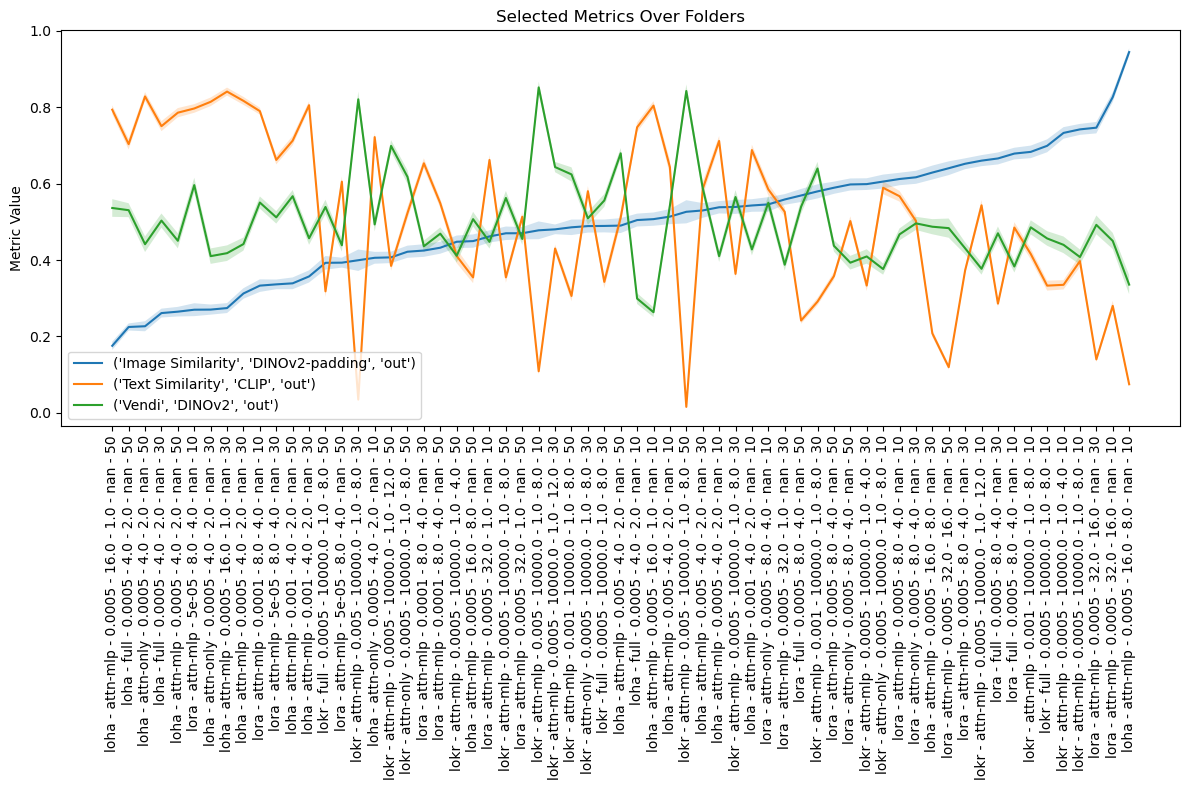

In [42]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'out'),
    ('Text Similarity', 'CLIP', 'out'),
    ('Vendi', 'DINOv2', 'out'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated, metrics_to_visualize, x_columns=x_columns)

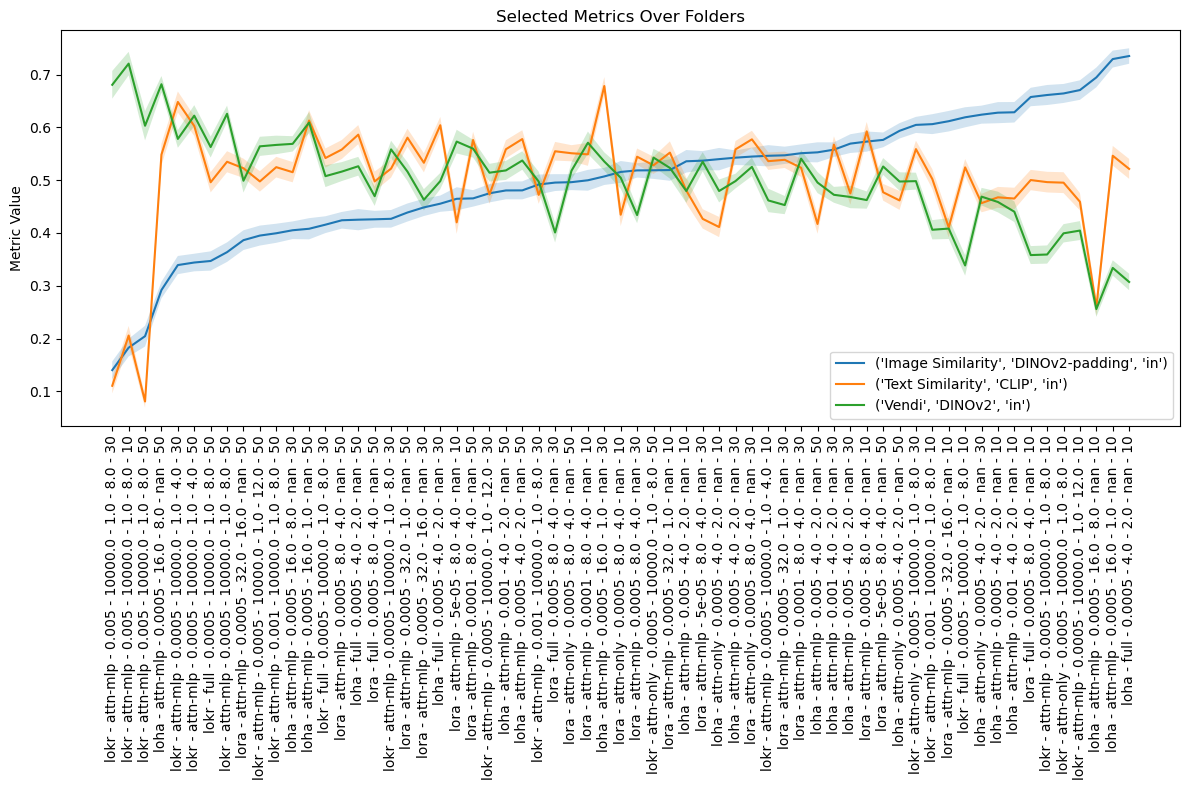

In [45]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'in'),
    ('Text Similarity', 'CLIP', 'in'),
    ('Vendi', 'DINOv2', 'in'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated, metrics_to_visualize, x_columns=x_columns)

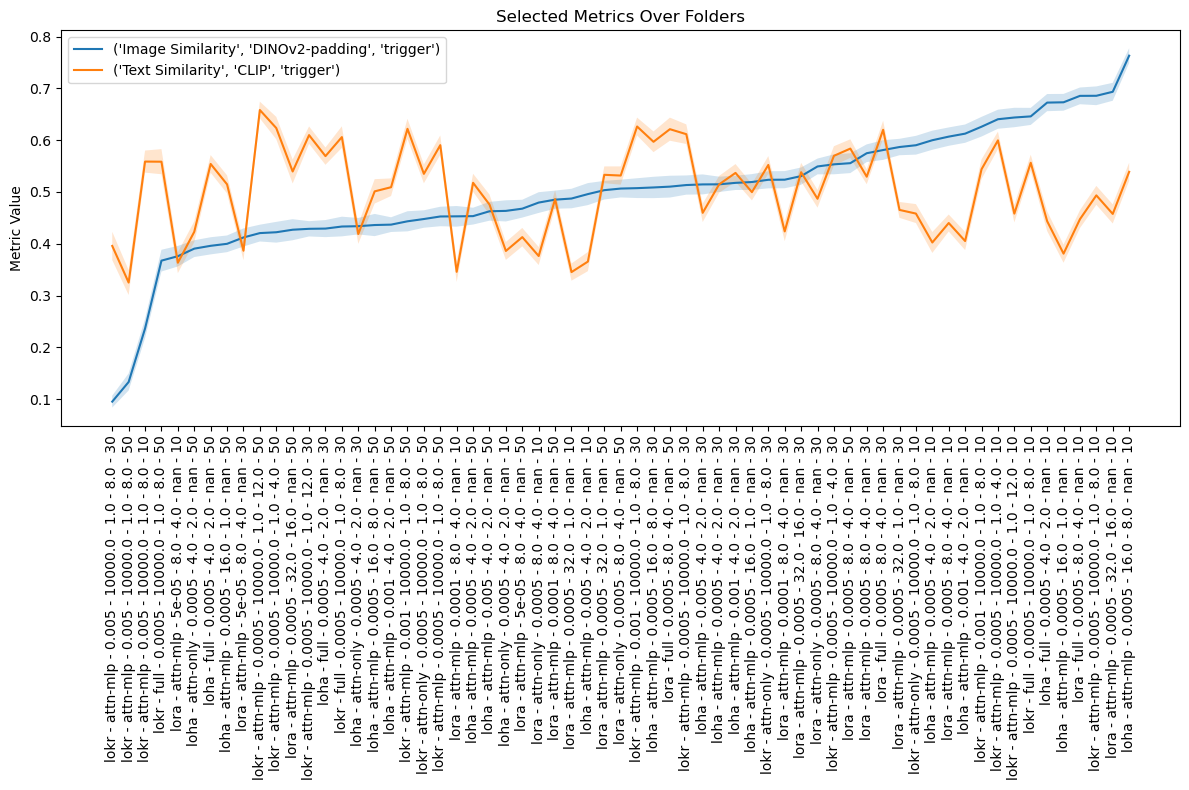

In [46]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'trigger'),
    ('Text Similarity', 'CLIP', 'trigger'),
    # ('Vendi', 'DINOv2', 'in'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated, metrics_to_visualize, x_columns=x_columns)

## People

In [47]:
metrics_aggregated_cat = aggregate_metrics(metrics_processed, level='Category', group_seeds=True)
display(metrics_aggregated_cat)

Config  Algo    Preset      Lr      Dim  \
Architecture                                                                 
Condition                                                                    
Statistics                                                                   
0                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
1                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
2                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
3                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
4                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
..                                    ...   ...       ...     ...      ...   
310           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
311           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
312           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
313           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
314           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   

             Alpha Factor Step     Category Image Similarity  ...     Vendi  \
Architecture                                       CLIP-crop  ...      CLIP   
Condition                                                 in  ...       out   
Statistics                                              mean  ...      mean   
0              4.0    NaN   10        anime         0.438158  ...  0.589781   
1              4.0    NaN   10       people         0.509921  ...  0.381860   
2              4.0    NaN   10        scene         0.787234  ...  0.498582   
3              4.0    NaN   10  stuffed_toy         0.742908  ...  0.483156   
4              4.0    NaN   10        style         0.587639  ...  0.508105   
..             ...    ...  ...          ...              ...  ...       ...   
310            1.0    8.0   50        anime         0.112723  ...  0.761444   
311            1.0    8.0   50       people         0.293018  ...  0.655501   
312            1.0    8.0   50        scene         0.045035  ...  0.861702   
313            1.0    8.0   50  stuffed_toy         0.068853  ...  0.920804   
314            1.0    8.0   50        style         0.224417  ...  0.937437   

                                                                            \
Architecture           ConvNeXt V2                                  DINOv2   
Condition                       in                 out                  in   
Statistics      stderr        mean    stderr      mean    stderr      mean   
0             0.048887    0.507683  0.044782  0.491941  0.042284  0.496185   
1             0.043777    0.542279  0.033539  0.500106  0.042582  0.414809   
2             0.041957    0.702837  0.023316  0.462766  0.032698  0.455319   
3             0.023893    0.605201  0.026350  0.552896  0.027833  0.428487   
4             0.026163    0.626646  0.034989  0.496201  0.029156  0.494428   
..                 ...         ...       ...       ...       ...       ...   
310           0.053010    0.187943  0.032788  0.866377  0.034287  0.385665   
311           0.066313    0.497995  0.078609  0.734634  0.054282  0.550384   
312           0.040645    0.954610  0.009469  0.877305  0.038171  0.928723   
313           0.018629    0.881501  0.032007  0.972518  0.005518  0.892139   
314           0.018400    0.293820  0.041637  0.927558  0.019908  0.254306   

                                            
Architecture                                
Condition                    out            
Statistics      stderr      mean    stderr  
0             0.044973  0.466420  0.045308  
1             0.046015  0.452128  0.049877  
2             0.034799  0.394326  0.035565  
3             0.030488  0.440012  0.025389  
4             0.032172  0.547619  0.027988  
..                 ...       ...       ...  
310           0.047159  0.682839  0.055691  
311         

In [49]:
metrics_aggregated_people = metrics_aggregated_cat[metrics_aggregated_cat['Category']=='people']

In [50]:
metrics_aggregated_people

Config  Algo    Preset      Lr      Dim  \
Architecture                                                                 
Condition                                                                    
Statistics                                                                   
1                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
6                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
11                  exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
16                exp-1002-sd15-lora32a16  lora  attn-mlp  0.0005     32.0   
21                exp-1002-sd15-lora32a16  lora  attn-mlp  0.0005     32.0   
..                                    ...   ...       ...     ...      ...   
291           exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
296           exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
301           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
306           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   
311           exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.0050  10000.0   

             Alpha Factor Step Category Image Similarity  ...     Vendi  \
Architecture                                   CLIP-crop  ...      CLIP   
Condition                                             in  ...       out   
Statistics                                          mean  ...      mean   
1              4.0    NaN   10   people         0.509921  ...  0.381860   
6              4.0    NaN   30   people         0.541392  ...  0.607291   
11             4.0    NaN   50   people         0.423463  ...  0.550363   
16            16.0    NaN   10   people         0.306906  ...  0.562563   
21            16.0    NaN   30   people         0.451431  ...  0.567545   
..             ...    ...  ...      ...              ...  ...       ...   
291            1.0    8.0   30   people         0.549160  ...  0.560769   
296            1.0    8.0   50   people         0.542638  ...  0.659997   
301            1.0    8.0   10   people         0.285799  ...  0.733262   
306            1.0    8.0   30   people         0.356404  ...  0.420149   
311            1.0    8.0   50   people         0.293018  ...  0.655501   

                                                                            \
Architecture           ConvNeXt V2                                  DINOv2   
Condition                       in                 out                  in   
Statistics      stderr        mean    stderr      mean    stderr      mean   
1             0.043777    0.542279  0.033539  0.500106  0.042582  0.414809   
6             0.050061    0.457637  0.048835  0.448750  0.037658  0.440835   
11            0.047260    0.600621  0.053600  0.481890  0.068294  0.643195   
16            0.069001    0.529065  0.066963  0.500697  0.061814  0.438070   
21            0.054837    0.557603  0.058886  0.629517  0.055936  0.464581   
..                 ...         ...       ...       ...       ...       ...   
291           0.061322    0.532865  0.057495  0.553909  0.054453  0.585887   
296           0.047404    0.565708  0.044083  0.695985  0.044199  0.512749   
301           0.055555    0.654804  0.067436  0.848362  0.046140  0.674878   
306           0.076756    0.583840  0.068869  0.522881  0.079062  0.730602   
311           0.066313    0.497995  0.078609  0.734634  0.054282  0.550384   

                                            
Architecture                                
Condition                    out            
Statistics      stderr      mean    stderr  
1             0.046015  0.452128  0.049877  
6             0.040719  0.589560  0.040443  
11            0.052668  0.555809  0.065801  
16            0.059210  0.498164  0.062447  
21            0.057593  0.563766  0.058680  
..                 ...       ...       ...  
291           0.060630  0.613327  0.052638  
296           0.048434  0.670466  0.035487  
301           0.061722  0.8

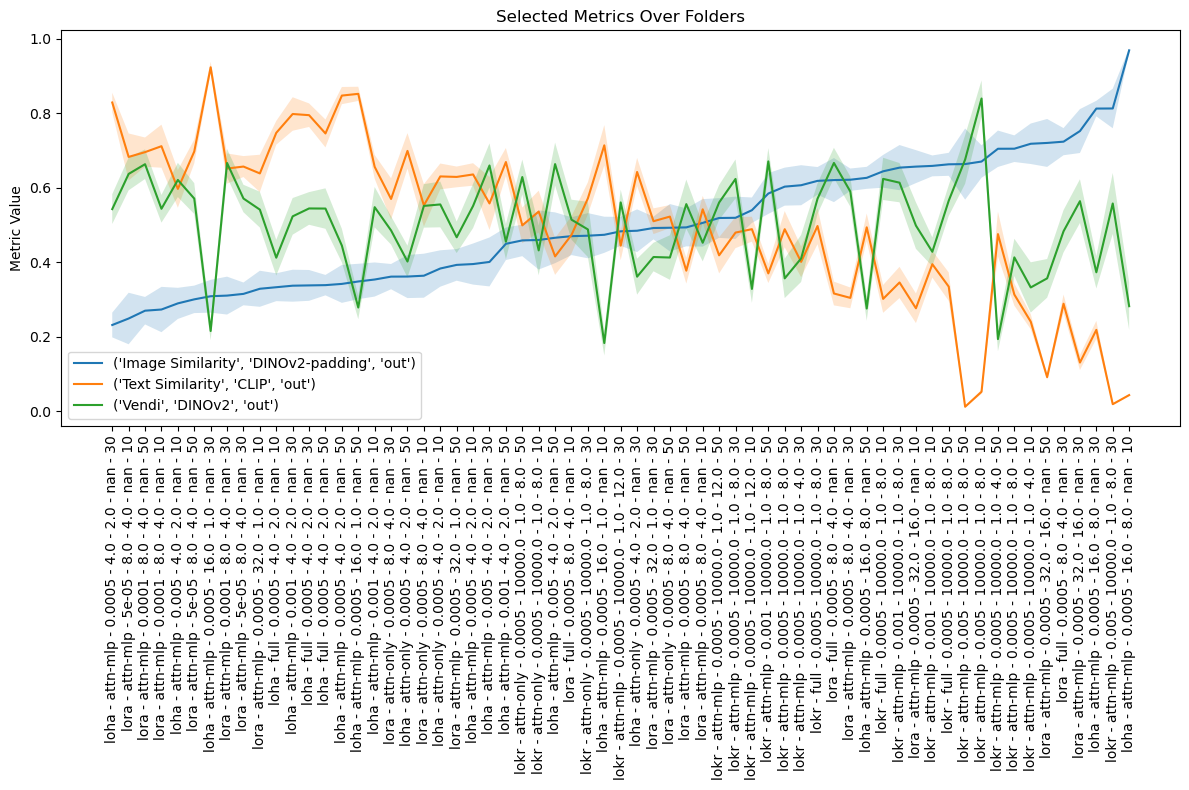

In [53]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'out'),
    ('Text Similarity', 'CLIP', 'out'),
    ('Vendi', 'DINOv2', 'out'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated_people, metrics_to_visualize, x_columns=x_columns)

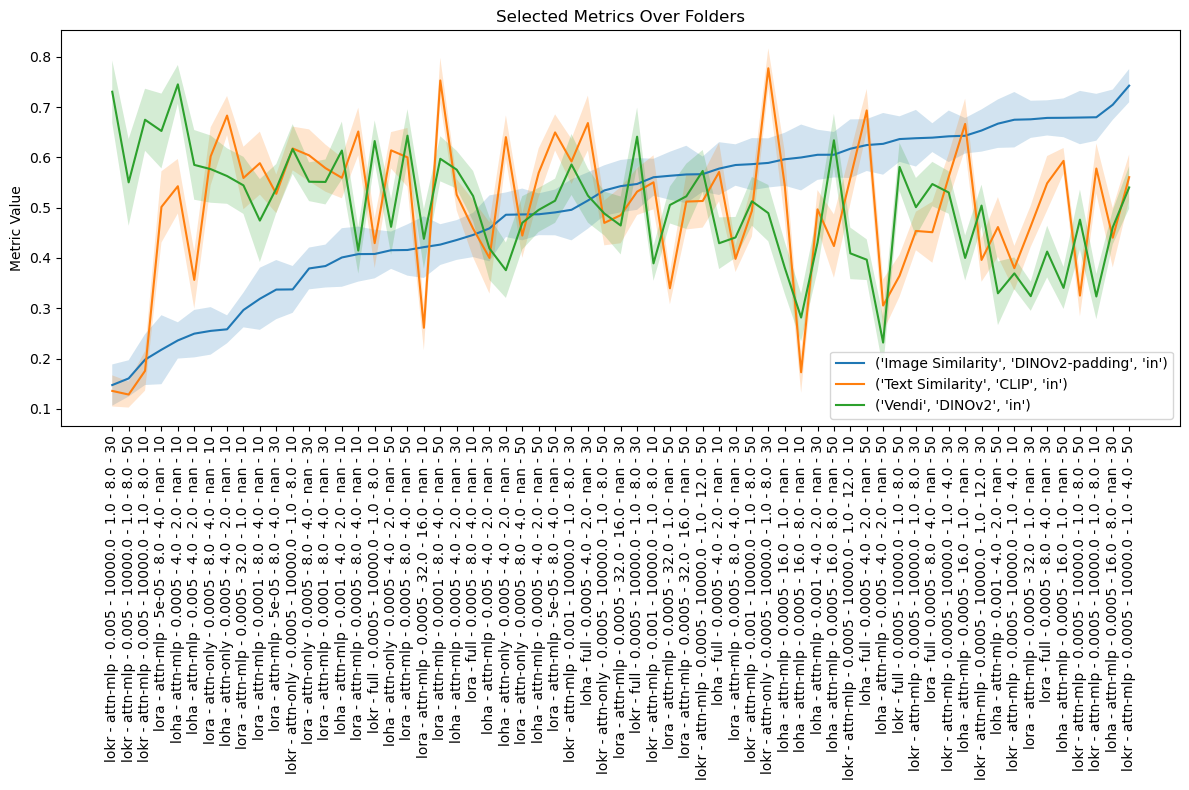

In [54]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'in'),
    ('Text Similarity', 'CLIP', 'in'),
    ('Vendi', 'DINOv2', 'in'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated_people, metrics_to_visualize, x_columns=x_columns)

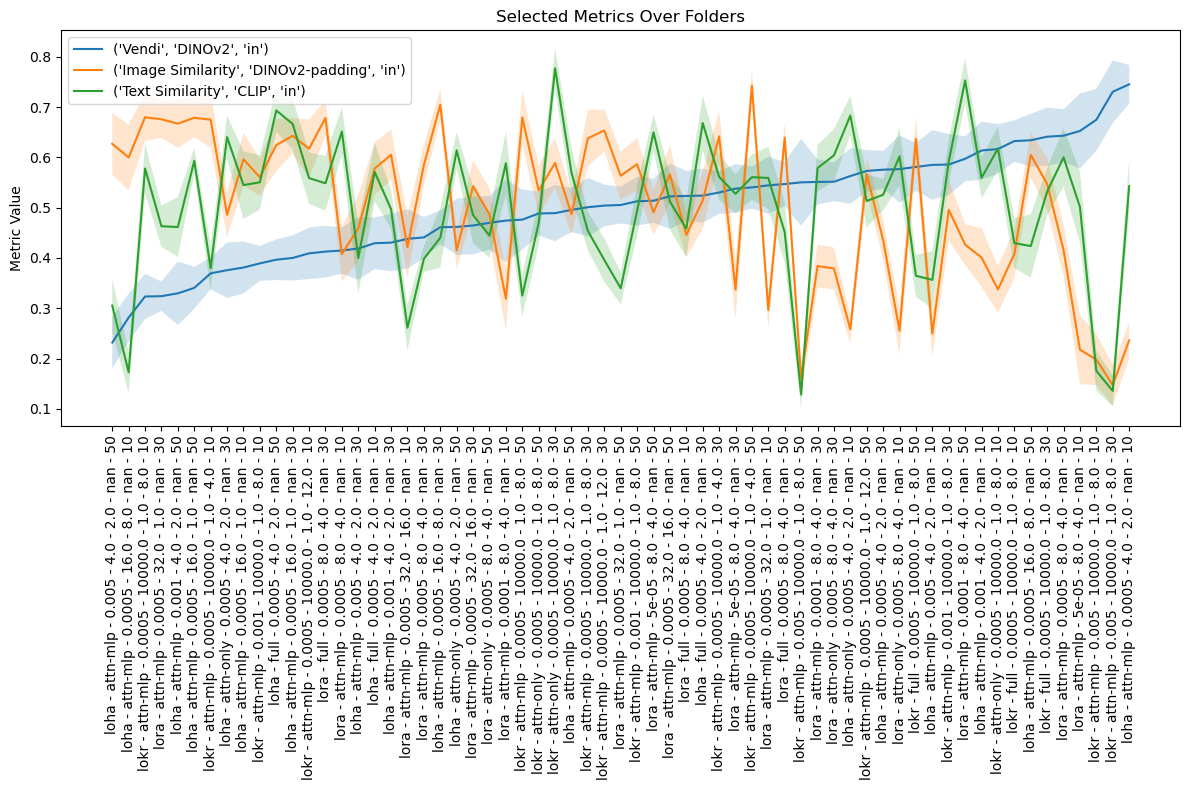

In [60]:
metrics_to_visualize = [
    ('Vendi', 'DINOv2', 'in'),
    ('Image Similarity', 'DINOv2-padding', 'in'),
    ('Text Similarity', 'CLIP', 'in'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated_people, metrics_to_visualize, x_columns=x_columns)

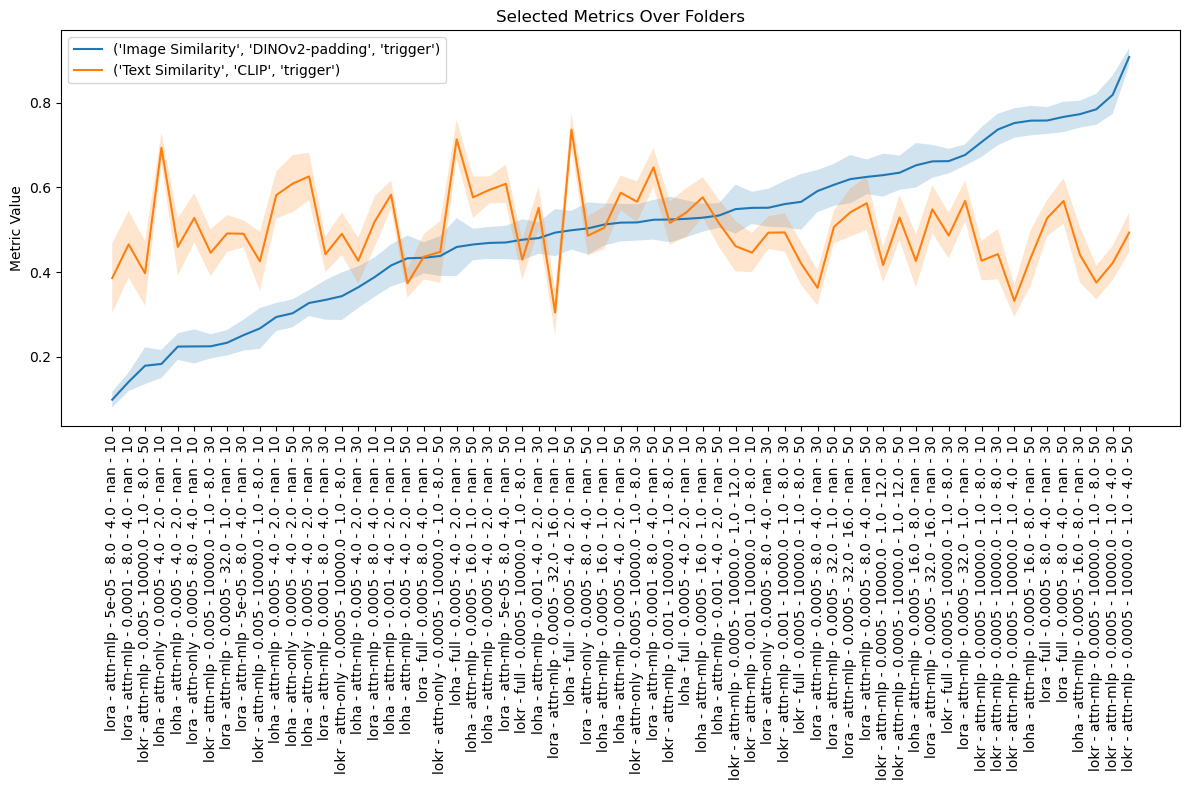

In [55]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'trigger'),
    ('Text Similarity', 'CLIP', 'trigger'),
    # ('Vendi', 'DINOv2', 'in'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated_people, metrics_to_visualize, x_columns=x_columns)

## Scene

In [56]:
metrics_aggregated_scene = metrics_aggregated_cat[metrics_aggregated_cat['Category']=='scene']

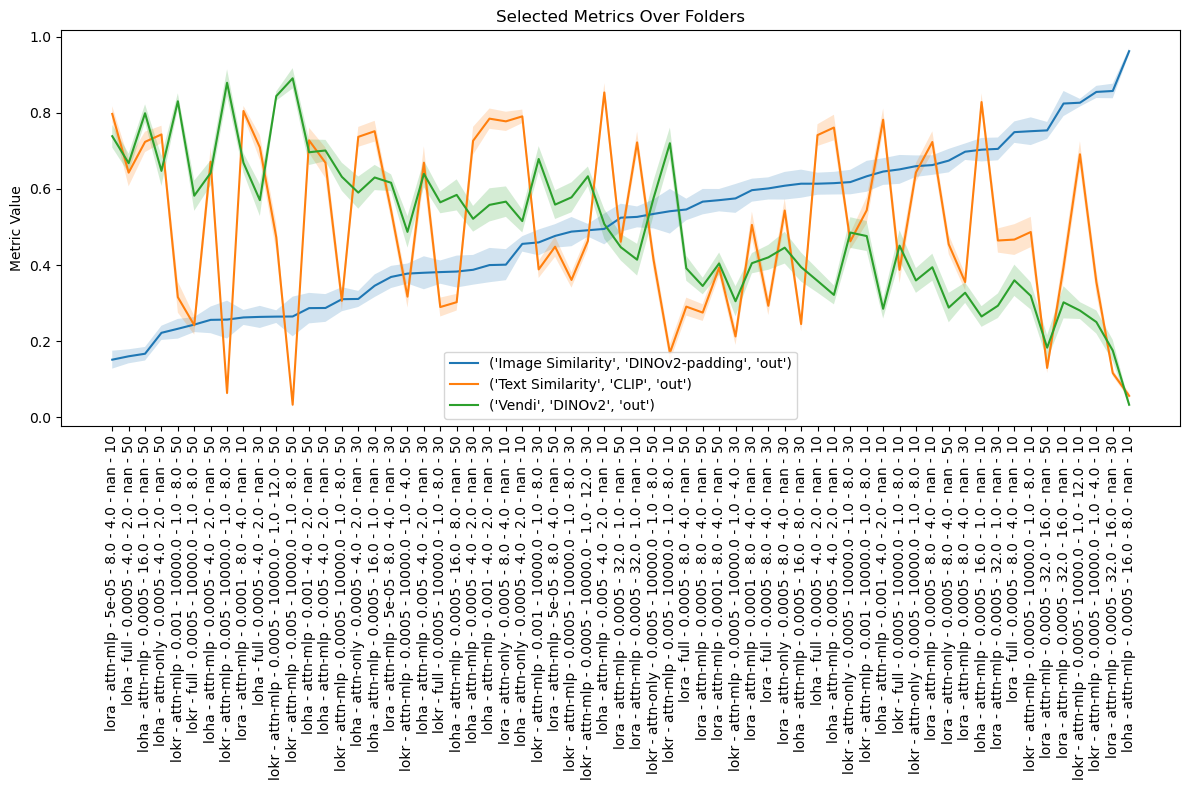

In [57]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'out'),
    ('Text Similarity', 'CLIP', 'out'),
    ('Vendi', 'DINOv2', 'out'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated_scene, metrics_to_visualize, x_columns=x_columns)

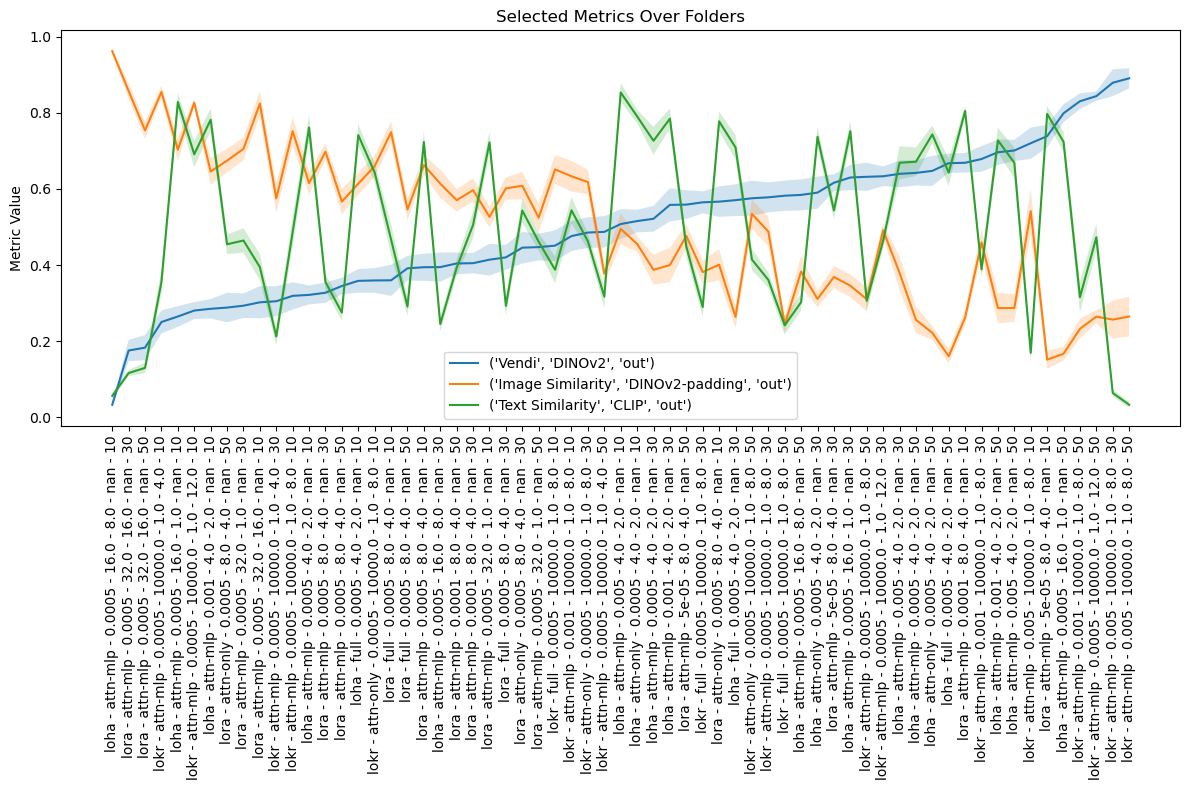

In [59]:
metrics_to_visualize = [
    ('Vendi', 'DINOv2', 'out'),
    ('Image Similarity', 'DINOv2-padding', 'out'),
    ('Text Similarity', 'CLIP', 'out'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated_scene, metrics_to_visualize, x_columns=x_columns)

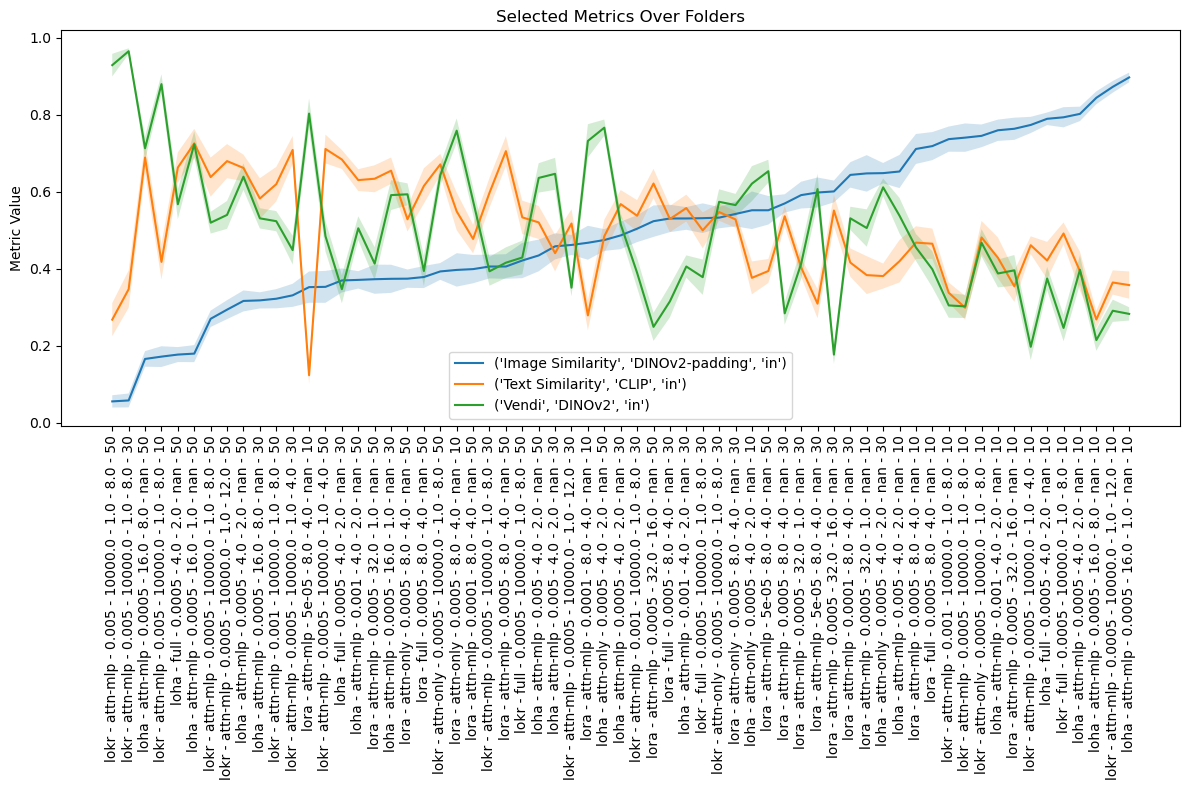

In [58]:
metrics_to_visualize = [
    ('Image Similarity', 'DINOv2-padding', 'in'),
    ('Text Similarity', 'CLIP', 'in'),
    ('Vendi', 'DINOv2', 'in'),
]
x_columns = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
plot_avg_metrics_curve(metrics_aggregated_scene, metrics_to_visualize, x_columns=x_columns)